<a href="https://colab.research.google.com/github/ngctnnnn/Math-for-Computer-Science-/blob/main/Linear_Regression_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

In [ ]:
%matplotlib inline 
#Enable to draw line in Jupyter Notebook

#Load library for code 
from d2l import tensorflow as d2l
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

As we know, *Linear Regression model* has the formula of:

$$
\hat{y} = \omega^{\top}x
$$


In [ ]:
#define our model a linear regression model
def linear_regression(x, w, b):
    return tf.matmul(x, w) + b

In order to generate input data for this model. Author use 3 paramters, which include **w**, **b**, **N**  
In which:
*   **w** (features) is the first input parameters generated from a Gaussian distribution. In this model, the author use a 2-dimensional matrix.
*   **b** is the second features
*   **N** is the number of data (size of matrix)

In [ ]:
#Self-create a dataset for LR-model
def generate_dataset(w, b, N):
    x = tf.zeros((N, w.shape[0]))
    #take the shape of w and generate a N-by-w.shape zero matrix 
    
    x += tf.random.normal(shape = x.shape)
    #push Gaussian-distributionally generated values into matrix x 

    y = tf.matmul(x, tf.reshape(w, (-1, 1))) + b
    #create a 2-by-1 matrix y by multiplying x to w and adding to b

    y += tf.random.normal(shape = y.shape, stddev = 0.1)
    #make noise to data by adding y to a normal distribution with a standard deviation of 0.01

    y = tf.reshape(y, (-1, 1))
    #reshape y

    return x, y

We create 2 correct coefficients for our model. Then we will generate our input throughout Gaussian distribution, using those 2 coefficients as means of our model.

In [ ]:
#define correct parameters for the model
true_w = tf.constant([2, -3.4])
true_b = 4.2

We will generate our input. 
Assume our model have features w and labels y:

In [ ]:
#generate input
#we called our model has feature w and label y
features, labels = generate_dataset(true_w, true_b, 1000)

We draw a scatter plot to show the correlence between w and y (or features and labels)

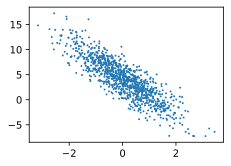

In [ ]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1)

This function is used to reduce training time by means of decreasing numbers of model running at a time and make many features, labels run at the same time

In [ ]:
def read_data(batch_size, features, labels):
    N = len(features)
    #save number of features

    indices = list(range(N))
    #create a list of N features we take from features dataset 

    random.shuffle(indices)
    #randomize data to ensure conditions in machine learning

    for i in range(0, N, batch_size):
    #loop from 0 to N with a step of batch_size

        j = tf.constant(indices[i: min(i + batch_size, N)])
        #just take a certain number of features to run at a time
        #in order to reduce model-training time

        yield tf.gather(features, j), tf.gather(labels, j)
        #yield is like return but return generators instead 

We initialize our first data value by using tf.Variable:

In [ ]:
w = tf.Variable(tf.random.normal(shape = (2, 1), mean = 0, stddev = 0.01), trainable = True)
#w is initialized by using a normal distribution with the mean of 0 and 
#the standard deviation of 0.01

b = tf.Variable(tf.zeros(1), trainable = True)
#initialize b with zero value

What is more, we have the loss function of linear regression:   
$$
E_{in}(\omega) = \frac{1}{2}\sum_{i=1}^{n}{(y_i-\omega^{\top}x})^{2}
$$


In [ ]:
def loss_function(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape))**2/2

In order to optimize our algorithm, we use Minibatch Stochastic Gradient Descent to reduce the loss of our model and update our parameters: 

*   First, we estimate the gradient of the loss through our parameters.
*   Then, we update our value in the same direction as the gradient.

In [ ]:
def stochastic_gradient_descent(parameters, gradient, learning_rate, batch_size):
    for param, grad in zip(parameters, gradient):
        #zip function is used to take iterator from variable "parameters" and 
        #"gradient" as iterators and loop 

        param.assign_sub(learning_rate * grad / batch_size)
        #update parameters with learning_rate * gradient / batch_size

Before training our model, we have to initialize necessary constant

In [ ]:
learning_rate = 0.03
num_epochs = 5
batch_size = 10

Training model by looping throughout some epochs     
Number of epoch is number of the time we put data onto our model to execute training. Due to the fact that our data is quite large, we have to divide our data into little batches so as to handle more easier.   
Batch size is the data we divided into to decrease data size   

In [ ]:
for epoch in range(num_epochs):
    for x, y in read_data(batch_size, features, labels):
        #tf.GradientTape is used to modify bias according to the direction
        #of the gradient in order to minimize the parameters for the model 
        with tf.GradientTape() as g:
            linreg = linear_regression(x, w, b)
            loss = loss_function(linreg, y)
            
        dw, db = g.gradient(loss, [w, b])
        
        stochastic_gradient_descent([w, b], [dw, db], learning_rate, batch_size)
        #update parameters in the same direction as the gradient to reduce loss

    train_l = loss_function(linear_regression(features, w, b), labels)
    #estimate the loss of model throughout sgd 
    
    print('Epoch ' + str(epoch + 1) + ': ' + str(float(tf.reduce_mean(train_l))))

Epoch 1: 0.04325701668858528
Epoch 2: 0.005279070697724819
Epoch 3: 0.005174737423658371
Epoch 4: 0.0051771970465779305
Epoch 5: 0.005177146755158901


Figure out the loss in our model:

In [ ]:
print(f'w error: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b error: {true_b - b}')

w error: [-0.00129533  0.00157309]
b error: [-0.00327444]
